In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import random
from PIL import Image as PImage
from os import listdir
import matplotlib.pyplot as plt

In [2]:
m_total_train=60000
m_total_test=10000
px=28
classes=10

train_set_x=np.zeros((m_total_train,px ,px))
test_set_x=np.zeros((m_total_test,px ,px))

train_set_y=np.zeros((m_total_train, classes ))       # i initialized  to one hot encoding
test_set_y=np.zeros((m_total_test, classes ))




In [3]:
def load_dataset(path):
    train_path=path+"/train/"
    test_path=path+"/test/"
    
    
    #retriev  train images dataset 
    count_train=0
    for _ in range(classes):
        imagesList = listdir(train_path+str(_))
        for image in imagesList:
            img = PImage.open(train_path +str(_)+"/"+ image)
            train_set_x[count_train] = np.array(img)
            
            train_set_y[count_train][_]=1
    
            count_train+=1
        
    
    #retriev  test images dataset 
    count_test=0        
    for __ in range(classes):
        imagesList = listdir(test_path+str(__))
        for image in imagesList:
            img = PImage.open(test_path +str(__)+"/"+ image)
            test_set_x[count_test] = np.array(img)
            
            test_set_y[count_test][__]=1
            
            
            
            count_test+=1
            
        

    

In [4]:
def vecorization():
    train_set_x_flatern=train_set_x.reshape(m_total_train, px*px)
    test_set_x_flatern=test_set_x.reshape(m_total_test,px*px)
    return train_set_x_flatern , test_set_x_flatern

In [5]:
def shuffle_train_dataset(data):
    input_with_label = np.concatenate((data, train_set_y), axis=1)
    
    #shuffle the dataset to get better traning
    np.random.shuffle(input_with_label)
    input_seperate=input_with_label[:,0:784]
    
    
    correspond_labels=input_with_label[:,784:794]
    
    return input_seperate , correspond_labels

    

In [6]:
#Load dataset from folder
path = "Task3_Data"
imgs = load_dataset(path)
train_set_x_flatern,test_set_x_flatern = vecorization()

In [7]:
#Final arrange dataset
final_train_x ,final_train_y=shuffle_train_dataset(train_set_x_flatern)
final_test_x=test_set_x_flatern
final_test_y=test_set_y

# TASK 3###############

final_train_x   ,  final_train_y ===> traning example:######
final_test_x   ,  final_test_y  ===> testing example:

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


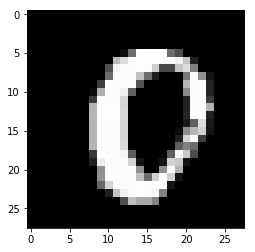

In [8]:
index=78
plt.imshow(final_train_x[index].reshape(28,28) ,cmap='gray')
print(final_train_y[index])

In [9]:
#check dataset dimension
print("train_x",final_train_x.shape)
print("train_y" ,final_train_y.shape)
print("test_x" ,final_test_x.shape)
print("test_y" ,final_test_y.shape)

train_x (60000, 784)
train_y (60000, 10)
test_x (10000, 784)
test_y (10000, 10)


# /////////////////////////////////////////////////////////////////

In [32]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

        

# Multi Layer Neural Net Class

In [33]:
class Net(object):
    def __init__(self,f,t):
        self.f=f
        self.t=t
        self.w=np.random.randn(f,t)
        self.b=np.random.randn(t, 1) 
        self.a=np.random.randn(t, 1) 
        self.z=np.random.randn(t, 1)
        
        ##derivatives 
        self.dw=np.random.randn(f,t)
        self.db=np.random.randn(t, 1) 
        self.dz=np.random.randn(t, 1)

In [34]:
class Neural_Net(object):
    def init_network(self, n_of_layers, neuron_per_layer):
        
        '''i merge the input and output in "neuron_per_layer"  variable like [784 ,100, 100, 10]
        784 and 10 is the input and output
        '''
        
        self.n_of_layers = n_of_layers
        self.neuron_per_layer = neuron_per_layer
        
        
        ##define variables on each layer
        net=[]
        for _ in range(self.n_of_layers -1):
            n = Net(neuron_per_layer[_],neuron_per_layer[_+1])
            net.append(n)
        
        return net
        
        
    def feedforward(self, net , batch_data):
        
        x=batch_data
        for i in range(self.n_of_layers-1):
            
            
            net[i].z=np.dot(x, net[i].w)+net[i].b.T
            net[i].a=sigmoid(net[i].z)
            #i already save the output of each layer instead of its gradient ..
            x = net[i].a
            
        return x   # at the end of forwording x will be output layer value
    

        
        
    def backPropagation(self ,net, batch_label, batch_x):
        
        out = net[self.n_of_layers-2].a        #output layer of model
        
        p=(out-batch_label)
        k=1
        inp=0
        
        #itterate backword from output layer towards input layer
        
        for i in range(self.n_of_layers-2, -1 ,-1):
            if i==0:
                inp = batch_x
            else:
                inp = net[i-1].a
            
            if i==self.n_of_layers-2 :   
                net[i].dz = (k * p )     
            else:
                m=np.dot(k,p.T)
                net[i].dz = sigmoid_prime(net[i].a)*m     #now i find local gradient with "saved output" of each layer
                
                
            net[i].dw = np.dot(net[i].dz.T , inp)
            net[i].db = np.dot(net[i].dz.T , np.ones((len(net[i].dz) ,1),dtype=np.int16 ))
            
            k = net[i].dz 
            p = net[i].w
            
            
            
            
     #update the parameters       
    def SGD(self, net , learning_rate):
        
        for _ in range(self.n_of_layers -1):
            
            net[_].w -= learning_rate * net[_].dw.T
            net[_].b -= learning_rate * net[_].db
            
            
    def loss_calculation(self, modelOutput, actual_target):    #MSE loss calculation
        
        return  np.mean((modelOutput - actual_target)**2)
    
    
    def train_sgd(self, net, learning_rate, batch_size, epoch):
        '''traning and testing dataset is already globaly define'''
        
        
        for epo in range(epoch):
            
            Total_loss=0
            val_loss=0
            
            for _ in range(int(m_total_train/batch_size)):  
                
                X_batch = final_train_x[_*batch_size : _*batch_size+batch_size]
                y_batch_label = final_train_y[_*batch_size : _*batch_size+batch_size]
                
                self.feedforward(net, X_batch)
                a_out=net[self.n_of_layers-2].a
                
                self.backPropagation(net, y_batch_label, X_batch)
                self.SGD(net, learning_rate)
                
                loss = self.loss_calculation(a_out, y_batch_label)
                loss1 = self.test(net, final_test_x, final_test_y)
                
                
                Total_loss+=loss
                val_loss+=loss1
                
                
            print(epo," Epoch completed out of ",epoch,"**** loss : ",Total_loss, "*****validation loss : ", val_loss)
        
    
    def test(self, net, test_set_x, test_set_y):
        self.feedforward(net, test_set_x)
        t_out=net[self.n_of_layers-2].a
        validation_loss = self.loss_calculation(t_out, test_set_y)
        
        return validation_loss
        
    def accuracy_of_model(self, net, final_test_y, final_test_x):
        y=self.feedforward(net,final_test_x)
        print("model accuracy  = ", np.equal(np.argmax(final_test_y, axis=-1), np.argmax(y, axis=-1)).mean())
    
    
    
    

In [35]:
#initialized hyper parameter

learning_rate=0.0001
batch_size=1000
total_epoch=10

input_l=784
output_l=10

#############################NOW REPORT THE MODEL WITH DIFFERENT NUMBER OF HIDDEN LAYERS##########################

# NN with 2 Hidden Layers

In [36]:
n_hiddenLayer=2
neuron_in_hl1=70
neuron_in_hl2=70

NN_of_layer1 = Neural_Net()

net = NN_of_layer1.init_network(n_hiddenLayer+2,  [input_l,  neuron_in_hl1, neuron_in_hl2, output_l]) 

NN_of_layer1.train_sgd(net, learning_rate, batch_size, total_epoch)  


/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0  Epoch completed out of  10 **** loss :  4.035060374790444 *****validation loss :  3.557383095370121
1  Epoch completed out of  10 **** loss :  2.5869676244849207 *****validation loss :  2.53049427794457
2  Epoch completed out of  10 **** loss :  2.336461538531014 *****validation loss :  2.308049160052817
3  Epoch completed out of  10 **** loss :  2.1927172040548215 *****validation loss :  2.152073419063774
4  Epoch completed out of  10 **** loss :  2.0968910558834875 *****validation loss :  2.058836624022787
5  Epoch completed out of  10 **** loss :  2.0528591168493375 *****validation loss :  2.0087564978201624
6  Epoch completed out of  10 **** loss :  2.0264896964474817 *****validation loss :  1.9951631150705373
7  Epoch completed out of  10 **** loss :  1.9790507725689284 *****validation loss :  1.9528883660114098
8  Epoch completed out of  10 **** loss :  1.9151212851146924 *****validation loss :  1.8849591951486746
9  Epoch completed out of  10 **** loss :  1.8445784332859607 *

#######Check Accuracy 

In [37]:
NN_of_layer1.accuracy_of_model(net, final_test_y, final_test_x)

model accuracy  =  0.8315


/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


##Check model on test image

/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


actual label =  2 -----predicted =  2       confidence =  0.7754570294973212


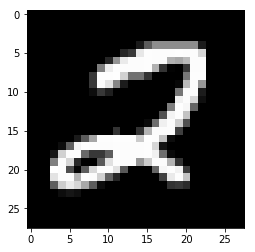

In [46]:
#check model on one example

index=2378                             #change index to check it
inp=final_test_x[index]                     #pich one image from test data


y_actual=final_test_y[index]                #  actual label
y_predict=NN_of_layer1.feedforward(net, inp)#predicted value


#predicted index of max value
pred_maxi = y_predict.argmax() 
pred_maxv = y_predict[0][pred_maxi]


#label index of max value
label_maxi = y_actual.argmax()                   


#show image
plt.imshow(inp.reshape(28,28) ,cmap='gray')
print("actual label = ",label_maxi,"-----predicted = ",pred_maxi ,"     ","confidence = ",pred_maxv )

# NN with 3 Hidden Layers 

In [39]:
n_hiddenLayer=3
neuron_in_hl1=70
neuron_in_hl2=70
neuron_in_hl3=70

NN_of_layer2 = Neural_Net()

net = NN_of_layer1.init_network(n_hiddenLayer+2, [input_l, neuron_in_hl1, neuron_in_hl2, neuron_in_hl3, output_l])

NN_of_layer1.train_sgd(net, learning_rate, batch_size, total_epoch)  

/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0  Epoch completed out of  10 **** loss :  4.78118825079698 *****validation loss :  4.290891870264568
1  Epoch completed out of  10 **** loss :  3.2041265022578966 *****validation loss :  3.1722688934822165
2  Epoch completed out of  10 **** loss :  2.794051138914706 *****validation loss :  2.7870122601570695
3  Epoch completed out of  10 **** loss :  2.5929019756936564 *****validation loss :  2.5941233109376802
4  Epoch completed out of  10 **** loss :  2.425542554512847 *****validation loss :  2.4137628029697593
5  Epoch completed out of  10 **** loss :  2.261904713297831 *****validation loss :  2.24483464310519
6  Epoch completed out of  10 **** loss :  2.1260243781131654 *****validation loss :  2.1050904218271222
7  Epoch completed out of  10 **** loss :  2.0070349323281502 *****validation loss :  1.9989044281366015
8  Epoch completed out of  10 **** loss :  1.9222737921830222 *****validation loss :  1.9014856732451202
9  Epoch completed out of  10 **** loss :  1.854750530618931 **

#######Check Accuracy 

In [40]:
NN_of_layer1.accuracy_of_model(net, final_test_y, final_test_x)

model accuracy  =  0.8268


/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


actual label =  9 -----predicted =  9       confidence =  0.9453263214036941


/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


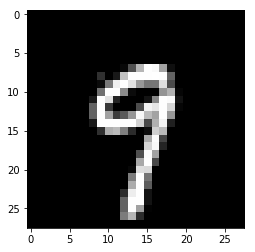

In [41]:
#check model on one example

index=9658                                 #change index to check it
inp=final_test_x[index]                     #pich one image from test data


y_actual=final_test_y[index]                #  actual label
y_predict=NN_of_layer1.feedforward(net, inp)#predicted value


#predicted index of max value
pred_maxi = y_predict.argmax() 
pred_maxv = y_predict[0][pred_maxi]


#label index of max value
label_maxi = y_actual.argmax()                   


#show image
plt.imshow(inp.reshape(28,28) ,cmap='gray')
print("actual label = ",label_maxi,"-----predicted = ",pred_maxi ,"     ","confidence = ",pred_maxv )

# NN with 4 Hidden Layers 

In [42]:
n_hiddenLayer=4
neuron_in_hl1=70
neuron_in_hl2=70
neuron_in_hl3=70
neuron_in_hl4=70

NN_of_layer2 = Neural_Net()
net = NN_of_layer1.init_network(n_hiddenLayer+2, [input_l, neuron_in_hl1, neuron_in_hl2, neuron_in_hl3, neuron_in_hl4, output_l])     
NN_of_layer1.train_sgd(net, learning_rate, batch_size, total_epoch) 

/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0  Epoch completed out of  10 **** loss :  5.083367748357488 *****validation loss :  4.661774880225388
1  Epoch completed out of  10 **** loss :  3.166742854750127 *****validation loss :  3.1712994675549036
2  Epoch completed out of  10 **** loss :  2.6532013439252218 *****validation loss :  2.6462355604052776
3  Epoch completed out of  10 **** loss :  2.302566211740643 *****validation loss :  2.2535582929396534
4  Epoch completed out of  10 **** loss :  2.0227535412085698 *****validation loss :  1.9822528537070967
5  Epoch completed out of  10 **** loss :  1.8625513521335564 *****validation loss :  1.8216622058819796
6  Epoch completed out of  10 **** loss :  1.7845527477993424 *****validation loss :  1.7488119894764038
7  Epoch completed out of  10 **** loss :  1.7694423195633964 *****validation loss :  1.7263646224455063
8  Epoch completed out of  10 **** loss :  1.7734257863872323 *****validation loss :  1.7179926392383855
9  Epoch completed out of  10 **** loss :  1.76253724286796

In [43]:
NN_of_layer1.accuracy_of_model(net, final_test_y, final_test_x)

/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


model accuracy  =  0.8294


/home/ahmed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


actual label =  7 -----predicted =  7       confidence =  0.9988496543383941


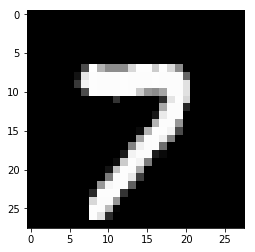

In [44]:
#check model on one example

index=7854                              #change index to check it
inp=final_test_x[index]                     #pich one image from test data


y_actual=final_test_y[index]                #  actual label
y_predict=NN_of_layer1.feedforward(net, inp)#predicted value


#predicted index of max value
pred_maxi = y_predict.argmax() 
pred_maxv = y_predict[0][pred_maxi]


#label index of max value
label_maxi = y_actual.argmax()                   


#show image
plt.imshow(inp.reshape(28,28) ,cmap='gray')
print("actual label = ",label_maxi,"-----predicted = ",pred_maxi ,"     ","confidence = ",pred_maxv )